## <center> Code to generate figures in stable representations manuscript</center> 
***

<a href='#figure_2'>Figure 2</a><br>
<a href='#figure_3'>Figure 3</a><br>
<a href='#figure_4'>Figure 4</a><br>
<a href='#figure_5'>Figure 5</a><br>


In [1]:
from pylab import *
import scipy.cluster.hierarchy as sch
import numpy as np
import fnmatch
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import scipy
import pdb

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import rgb2hex, colorConverter
from scipy.spatial import distance
from scipy import signal, stats
import matplotlib.ticker as ticker
import statsmodels.api as sm
from matplotlib import gridspec

%matplotlib inline
sns.set_context(context='paper', font_scale=2.0)
sns.set_style("white", {'axes.linewidth':0.0, 'axes.edgecolor':'white'})

***

<a id='Figure_2'></a>

<a id='figure_2'></a>

### fig.2b

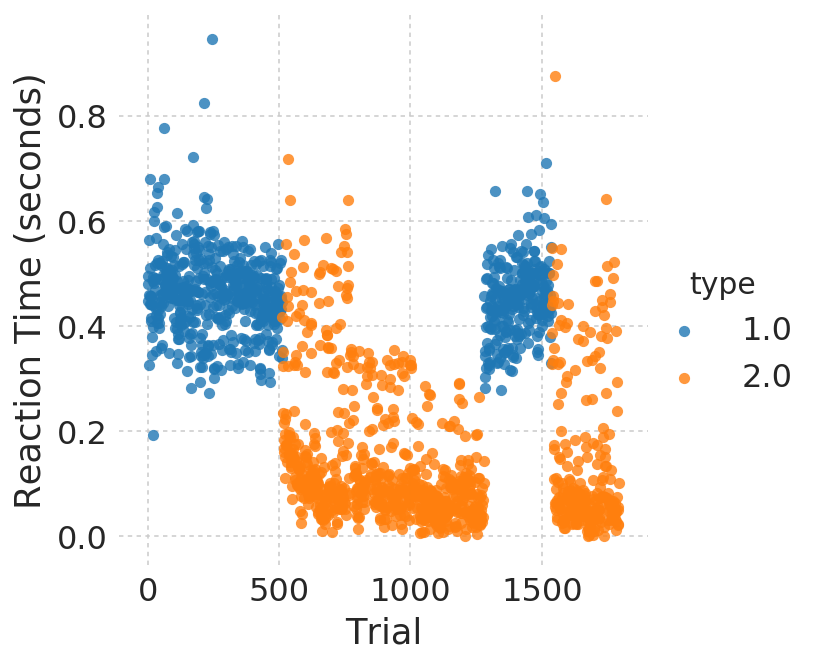

In [2]:
data_out = pd.read_csv('/home/beukema2/Desktop/source_data/fig2b_rep_subject_Day_12.csv')
lag_names = ['lag' + str(i) for i in  range(1,32)]
data_lags = pd.DataFrame(columns = lag_names)
sum_names = ['block', 'accuracy', 'rt_all', 'rt_cor', 'sdAcc', 'sdRT']
data_summary = pd.DataFrame(columns = (sum_names))
skip_index = 32
max_lags = 31
for i in np.unique(data_out[['block']]):
    data_out['trial'] = np.array(range(1,len(data_out)+1))
    if i ==6:
        ax = sns.lmplot('trial', 'rt', hue = 'type', data=data_out, fit_reg=False)
        plt.grid(linestyle='dotted')
        plt.ylabel('Reaction Time (seconds)')
        plt.xlabel('Trial')     

### fig.2c

/home/beukema2/anaconda/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


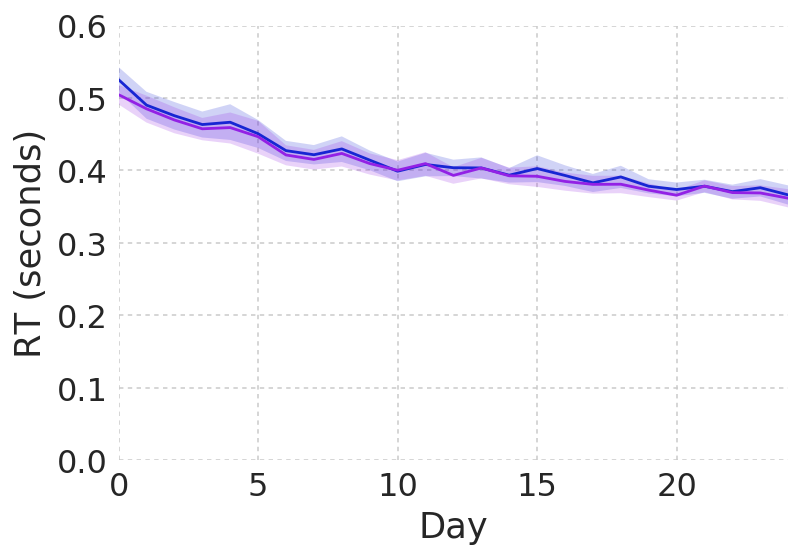

In [3]:
block6 = pd.read_csv(os.path.expanduser('/home/beukema2/Desktop/source_data/fig2c_control_raw_rts_block6.csv'))
block6 = pd.melt(block6, id_vars=["Day"], var_name="subject")
block6['Group'] = np.array('sequence')
block7 = pd.read_csv(os.path.expanduser('/home/beukema2/Desktop/source_data/fig2c_control_raw_rts_block7.csv'))
block7 = pd.melt(block7, id_vars=["Day"], var_name="subject")
block7['Group'] = np.array('random')
bothblocks=block6.append(block7,ignore_index = True)
ax = sns.tsplot(data=bothblocks, time="Day", unit="subject",ci=68, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#1726d3', '#9321e5'])
ax.set(xlabel='Day', ylabel='RT (seconds)')
ax.set(ylim=(0, .6))
ax.legend_.remove()
plt.grid(linestyle='dotted')

### fig.2d

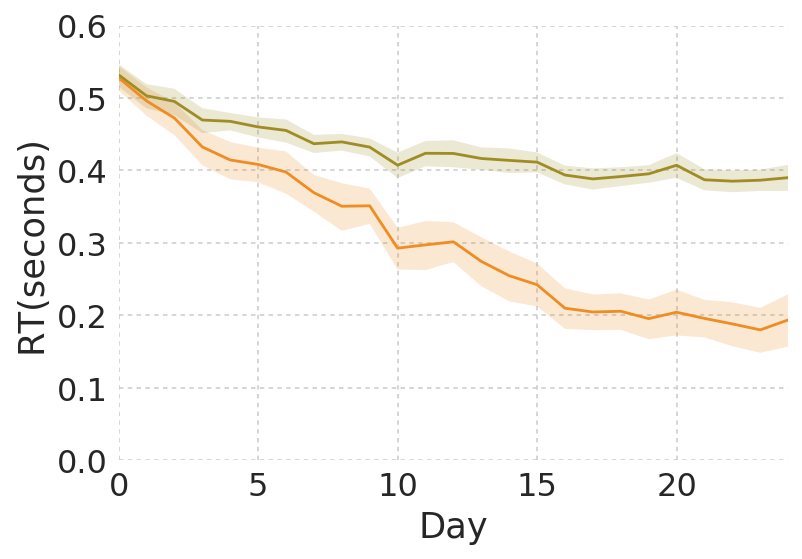

In [4]:
block6 = pd.read_csv(os.path.expanduser('/home/beukema2/Desktop/source_data/fig2c_sequence_raw_rts_block6.csv'))
block6 = pd.melt(block6, id_vars=["Day"], var_name="subject")
block6['Group'] = np.array('sequence')
block7 = pd.read_csv(os.path.expanduser('/home/beukema2/Desktop/source_data/fig2c_sequence_raw_rts_block7.csv'))
block7 = pd.melt(block7, id_vars=["Day"], var_name="subject")
block7['Group'] = np.array('random')
bothblocks=block6.append(block7,ignore_index = True)
ax = sns.tsplot(data=bothblocks, time="Day", unit="subject",ci=68, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#9f8d23'])
ax.set(xlabel='Day', ylabel='RT(seconds)')
ax.set(ylim=(0, .6))
ax.legend_.remove()
plt.grid(linestyle='dotted')

### fig.2e

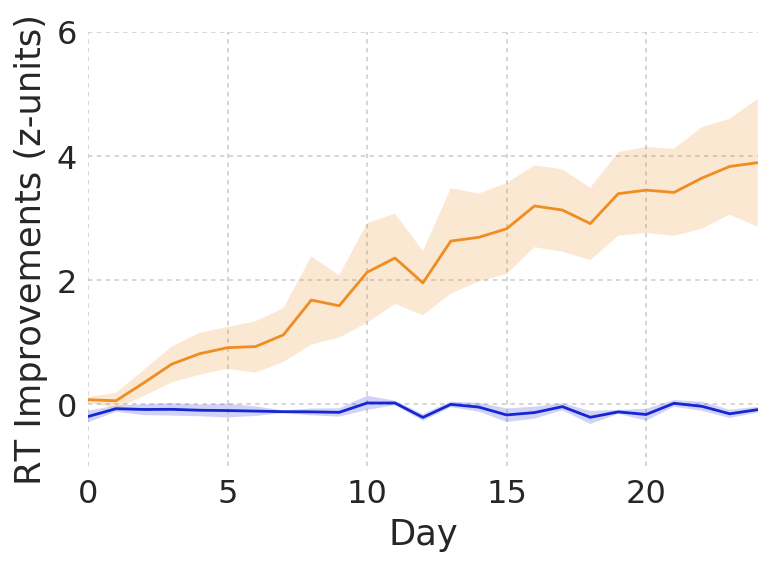

In [5]:
seqz = pd.read_csv(os.path.expanduser('~/Desktop/source_data/fig2e_seqz.csv'))
seqz = pd.melt(seqz, id_vars=["Day"], var_name="subject")
seqz['Group'] = np.array('sequence')
conz = pd.read_csv(os.path.expanduser('~/Desktop/source_data/fig2e_conz.csv'))
conz = pd.melt(conz, id_vars=["Day"], var_name="subject")
conz['Group'] = np.array('random')
bothz=seqz.append(conz,ignore_index = True)
ax = sns.tsplot(data=bothz, time="Day", unit="subject",ci=68, value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='RT Improvements (z-units)')
ax.set(ylim=(-1, 6))
ax.legend_.remove()
plt.grid(linestyle='dotted')

### fig.2f

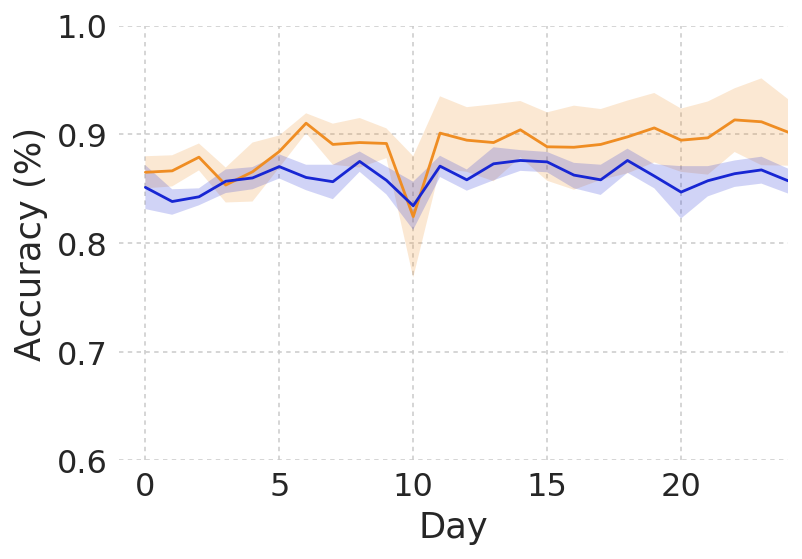

In [6]:
seqacc = pd.read_csv('/home/beukema2/Desktop/source_data/fig2f_seqacc.csv')
seqacc = pd.melt(seqacc, id_vars=["Day"], var_name="subject")
seqacc['Group'] = np.array('sequence')    
conacc = pd.read_csv('/home/beukema2/Desktop/source_data/fig2f_conacc.csv')
conacc = pd.melt(conacc, id_vars=["Day"], var_name="subject")
conacc['Group'] = np.array('random')
bothacc=seqacc.append(conacc,ignore_index = True)
ax = sns.tsplot(data=bothacc, time="Day", unit="subject", value="value", condition="Group",estimator=np.nanmean, interpolate = True, color=['#ef8d23', '#1726d3'], err_style='ci_band', ci=68)
ax.set(xlabel='Day', ylabel='Accuracy (%)')
ax.set(ylim=(0.6,1))
ax.set(xlim=(-1,24))
ax.legend_.remove()
plt.grid(linestyle='dotted')

***

<a id='figure_3'></a>

### fig.3a

/home/beukema2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


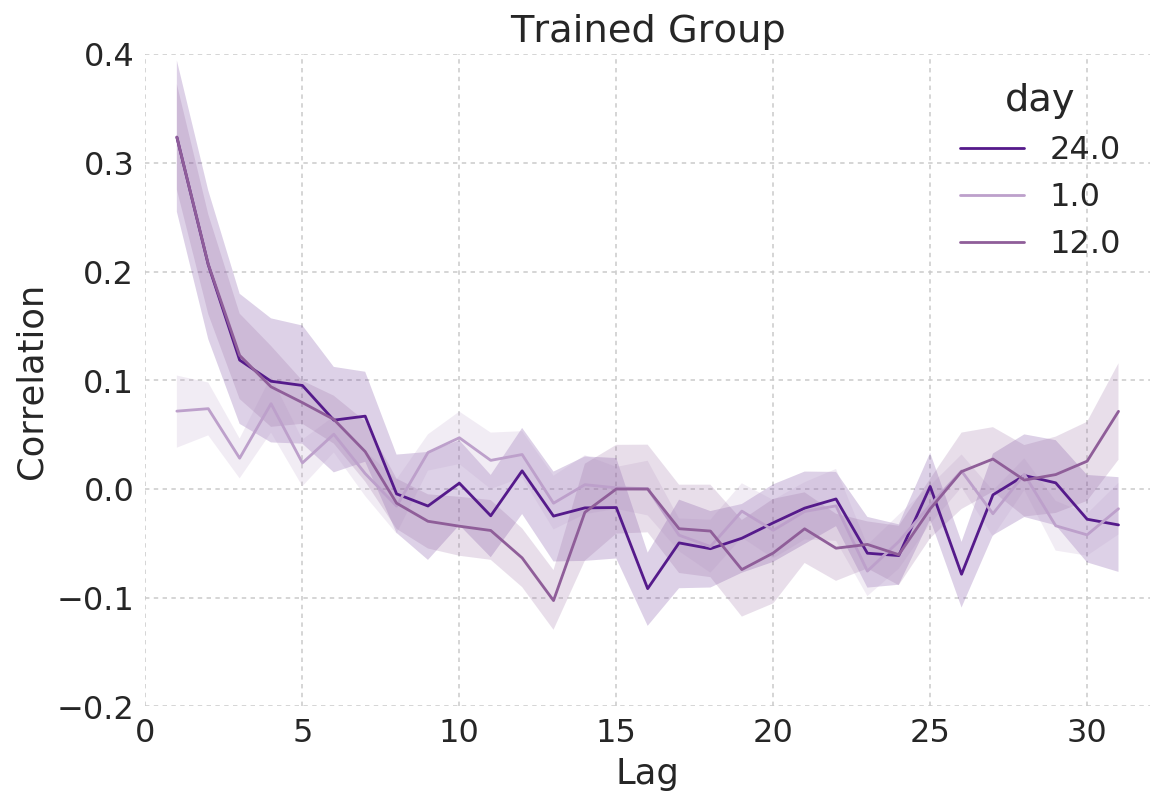

In [7]:
df = pd.read_csv('/home/beukema2/Desktop/source_data/fig3a_trainedgroup_autocorr.csv')
lag_names = ['lag' + str(i) for i in  range(1,32)]
df = pd.melt(df, id_vars=["day", 'subject'], value_vars = lag_names)
df['Group'] = np.array('sequence')
df['variable'] = df['variable'].map(lambda x: x.lstrip('lag').rstrip('aAbBcC'))
df = df[(df.day == 1) | (df.day == 12) | (df.day == 24)]
df.to_csv(os.path.expanduser('~/Dropbox/test.csv'))
fig = plt.figure(figsize=(9,6))
colordict = {1:'#BDA0CB', 12:'#8F5E99', 24:'#551A8B'}
df = df.convert_objects(convert_numeric=True)
ax = sns.tsplot(time='variable', value='value',unit='subject', \
                condition="day",data=df,interpolate=True, 
                color =colordict, ci=68)
ax.set(xlabel='Lag', ylabel='Correlation')
ax.set(xlim=(0, 32))
ax.set(ylim=(-.2, .4))
ax.set_title('Trained Group')
plt.grid(linestyle='dotted')

### fig.3b

/home/beukema2/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


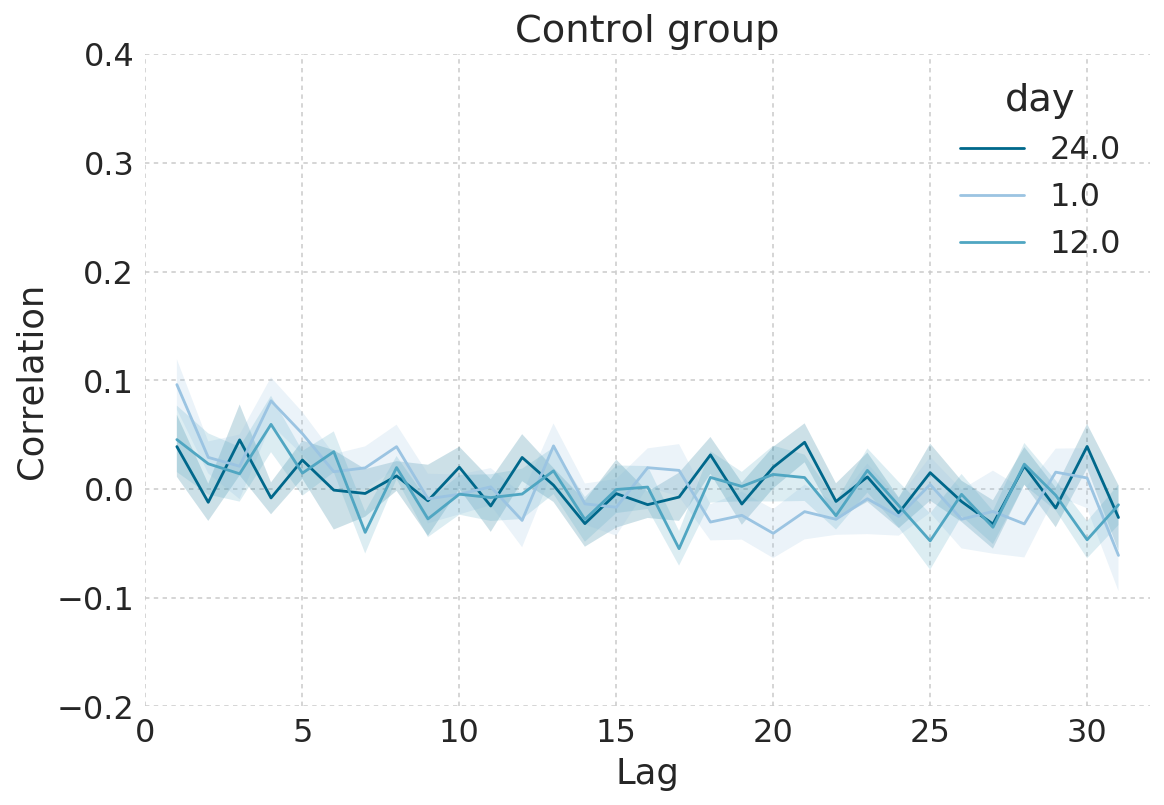

In [8]:
df = pd.read_csv('/home/beukema2/Desktop/source_data/fig3b_controlgroup_autocorr.csv')
lag_names = ['lag' + str(i) for i in  range(1,32)]
df = pd.melt(df, id_vars=["day", 'subject'], value_vars = lag_names )
df['Group'] = np.array('control')
df['variable'] = df['variable'].map(lambda x: x.lstrip('lag').rstrip('aAbBcC'))
df = df[(df.day == 1) | (df.day == 12) | (df.day == 24)]
fig = plt.figure(figsize=(9,6))

colordict = {1:'#9BC4E2', 12:'#50A6C2', 24:'#00688B'}
df = df.convert_objects(convert_numeric=True)
ax = sns.tsplot(time='variable', value='value',unit='subject', \
                condition="day",data=df,interpolate=True, 
                color =colordict, ci=68)
ax.set(xlabel='Lag', ylabel='Correlation')
ax.set(xlim=(0, 32))
ax.set(ylim=(-.2,.4))
ax.set_title('Control group')
plt.grid(linestyle='dotted')

### fig.3e

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

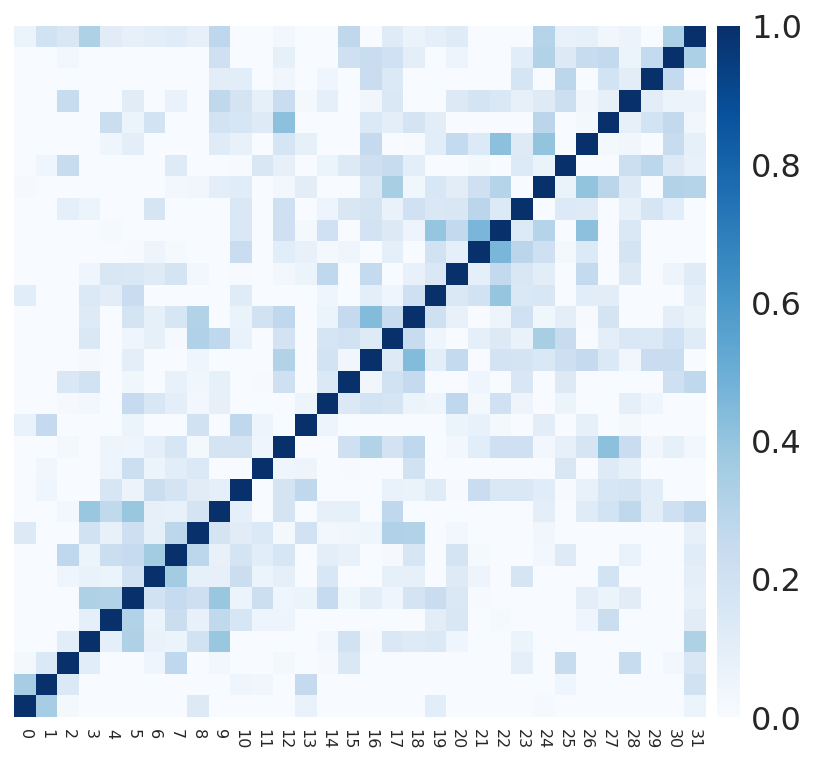

In [9]:
D = np.genfromtxt('/home/beukema2/Desktop/source_data/fig3c_day1_mean_corr.csv', delimiter=',')
fig = plt.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.Blues, vmin=.0,vmax=1.0)
axmatrix.set_xticks([])
axmatrix.set_yticks([])
axmatrix.set_xticks(range(32))
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()
axmatrix.xaxis.set_label('Sequence Position')
plt.xticks(rotation=-90, fontsize=8)
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
axmatrix.xaxis.tick_bottom()
plt.xticks(rotation=90, fontsize=4)

### fig.3f

(array([], dtype=float64), <a list of 0 Text xticklabel objects>)

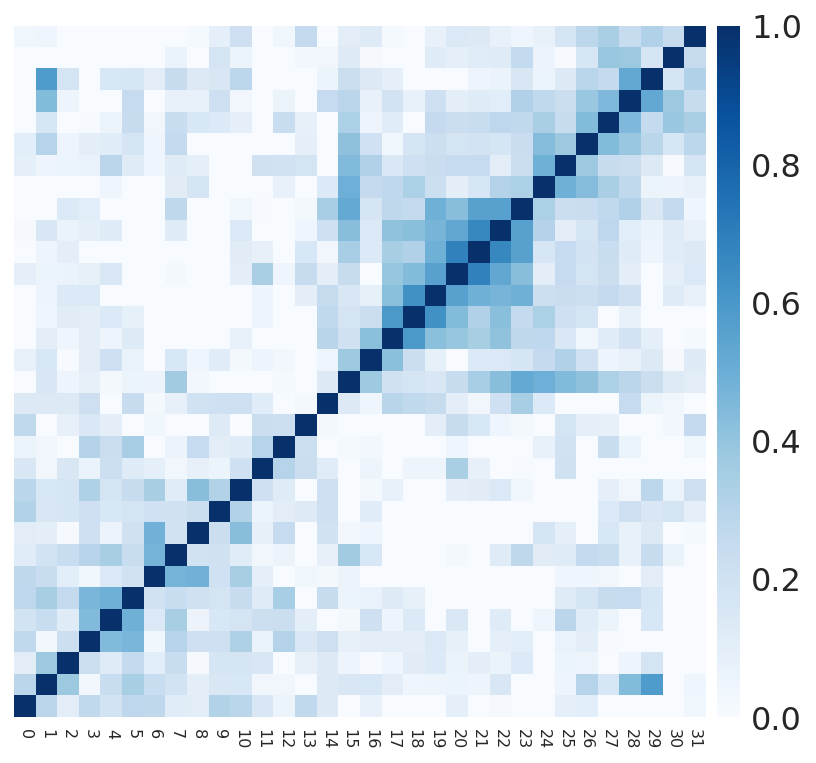

In [10]:
D = np.genfromtxt('/home/beukema2/Desktop/source_data/fig3d_day24_mean_corr.csv', delimiter=',')
fig = plt.figure(figsize=(8,8))
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.Blues, vmin=.0,vmax=1.0)
axmatrix.set_xticks([])
axmatrix.set_yticks([])
axmatrix.set_xticks(range(32))
axmatrix.xaxis.set_label_position('bottom')
axmatrix.xaxis.tick_bottom()
axmatrix.xaxis.set_label('Sequence Position')
plt.xticks(rotation=-90, fontsize=8)
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
axmatrix.xaxis.tick_bottom()
plt.xticks(rotation=90, fontsize=4)

### fig.3f

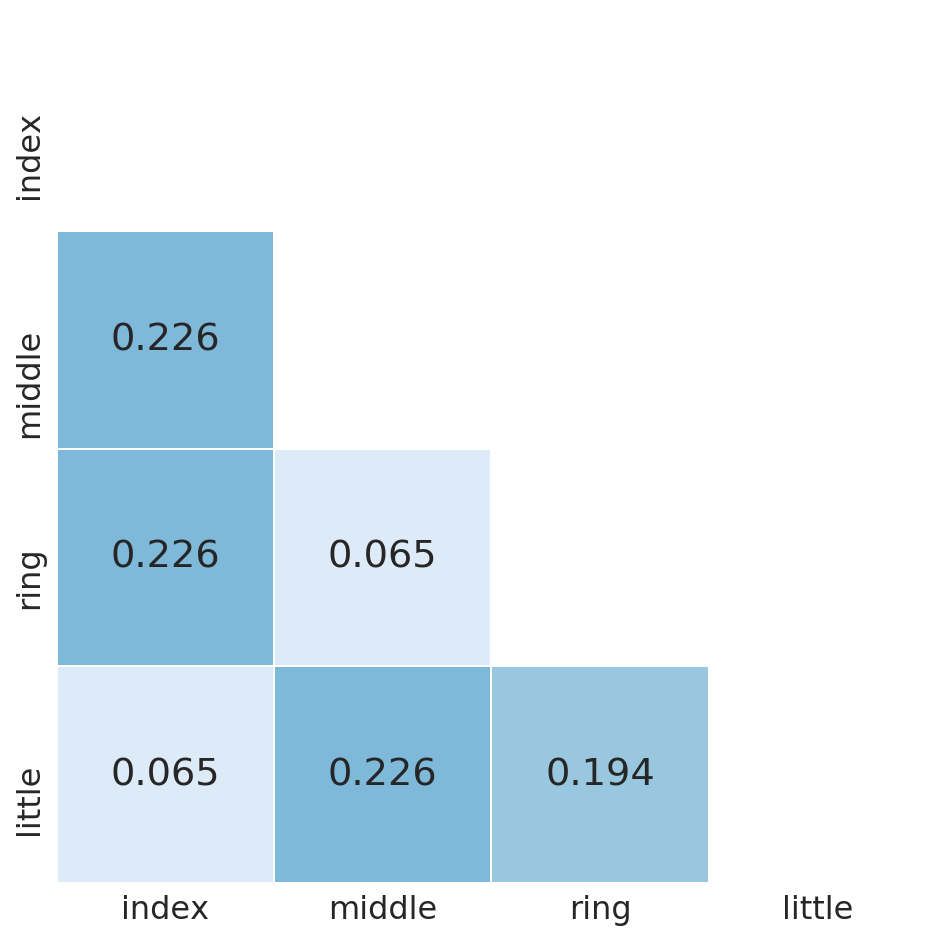

In [11]:
mean_distances = np.genfromtxt('/home/beukema2/Desktop/source_data/fig3f_actualcorr.csv',  delimiter=',')
mean_distances = np.tril(mean_distances, k=-1)
fig = plt.figure(figsize=(8,8))
mean_distances[mean_distances==0]=np.nan
labels = ['index', 'middle', 'ring', 'little']
trueD = sns.heatmap(mean_distances, annot=True, fmt='.3f', linewidths=.5, cmap = plt.cm.Blues, \
                    vmin=0.0, vmax=.5, square=True, cbar=False, xticklabels=labels, yticklabels=labels)

### fig.3g

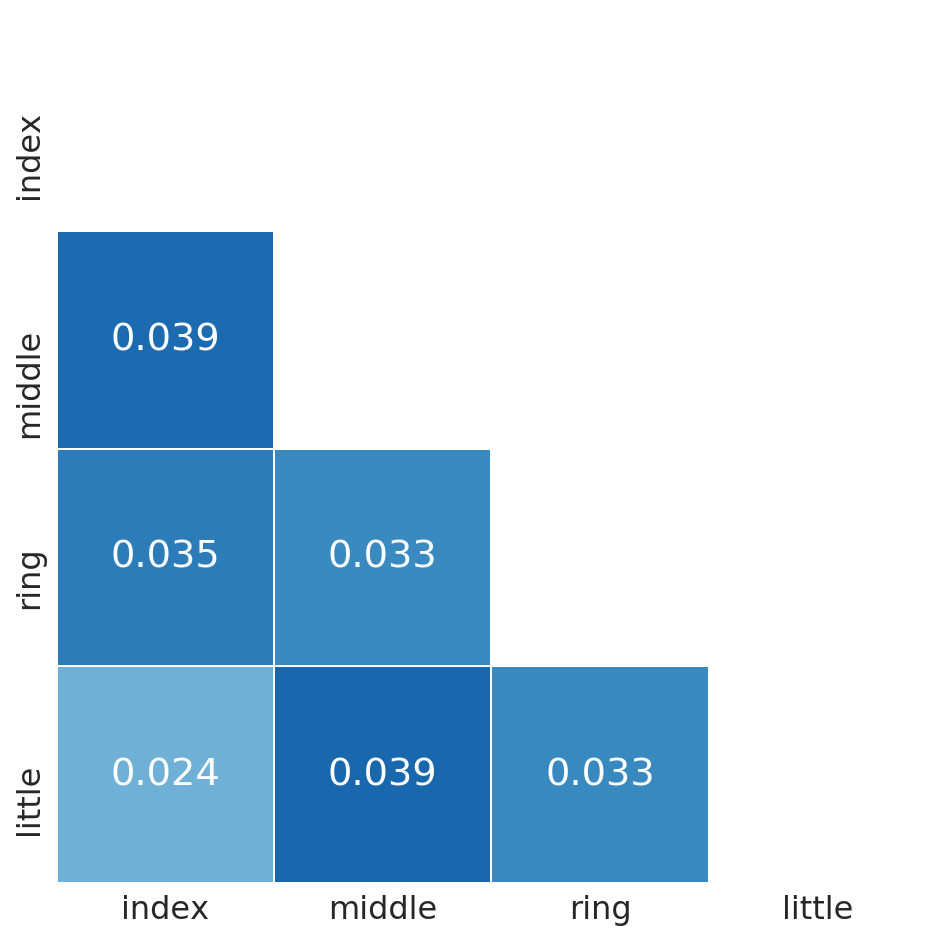

In [12]:
mean_distances = np.genfromtxt('/home/beukema2/Desktop/source_data/fig3f_observedcorr.csv',  delimiter=',')
mean_distances = np.tril(mean_distances, k=-1)
fig = plt.figure(figsize=(8,8))
mean_distances[mean_distances==0]=np.nan
labels = ['index', 'middle', 'ring', 'little']
trueD = sns.heatmap(mean_distances, annot=True, fmt='.3f', linewidths=.5, cmap = plt.cm.Blues, \
                    vmin=0.0, vmax=.05, square=True, cbar=False, xticklabels=labels, yticklabels=labels)

### fig.3h

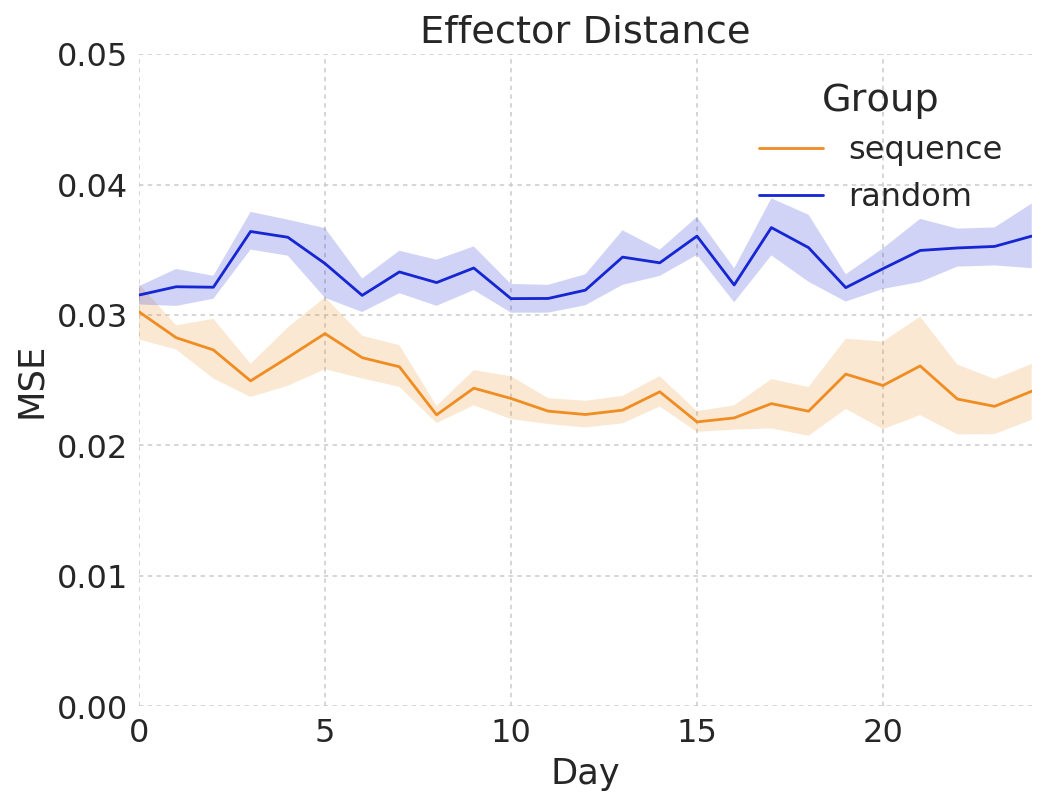

In [13]:
df = pd.read_csv('/home/beukema2/Desktop/source_data/fig3h_mse_trained.csv')
df2 = pd.read_csv('/home/beukema2/Desktop/source_data/fig3h_mse_control.csv')
bigdata=df.append(df2,ignore_index = True)
plt.figure(figsize=[8,6])
ax = sns.tsplot(data=bigdata, time="Day", unit="variable",ci=68, value="value", \
                condition="Group",estimator=np.nanmean, interpolate = True, \
                color=['#ef8d23', '#1726d3'])
ax.set(xlabel='Day', ylabel='MSE')
ax.set(title= 'Effector Distance')
ax.set(ylim=(0.0, 0.05))
plt.grid(linestyle='dotted')

***

<a id='figure_4'></a>

### fig.4d

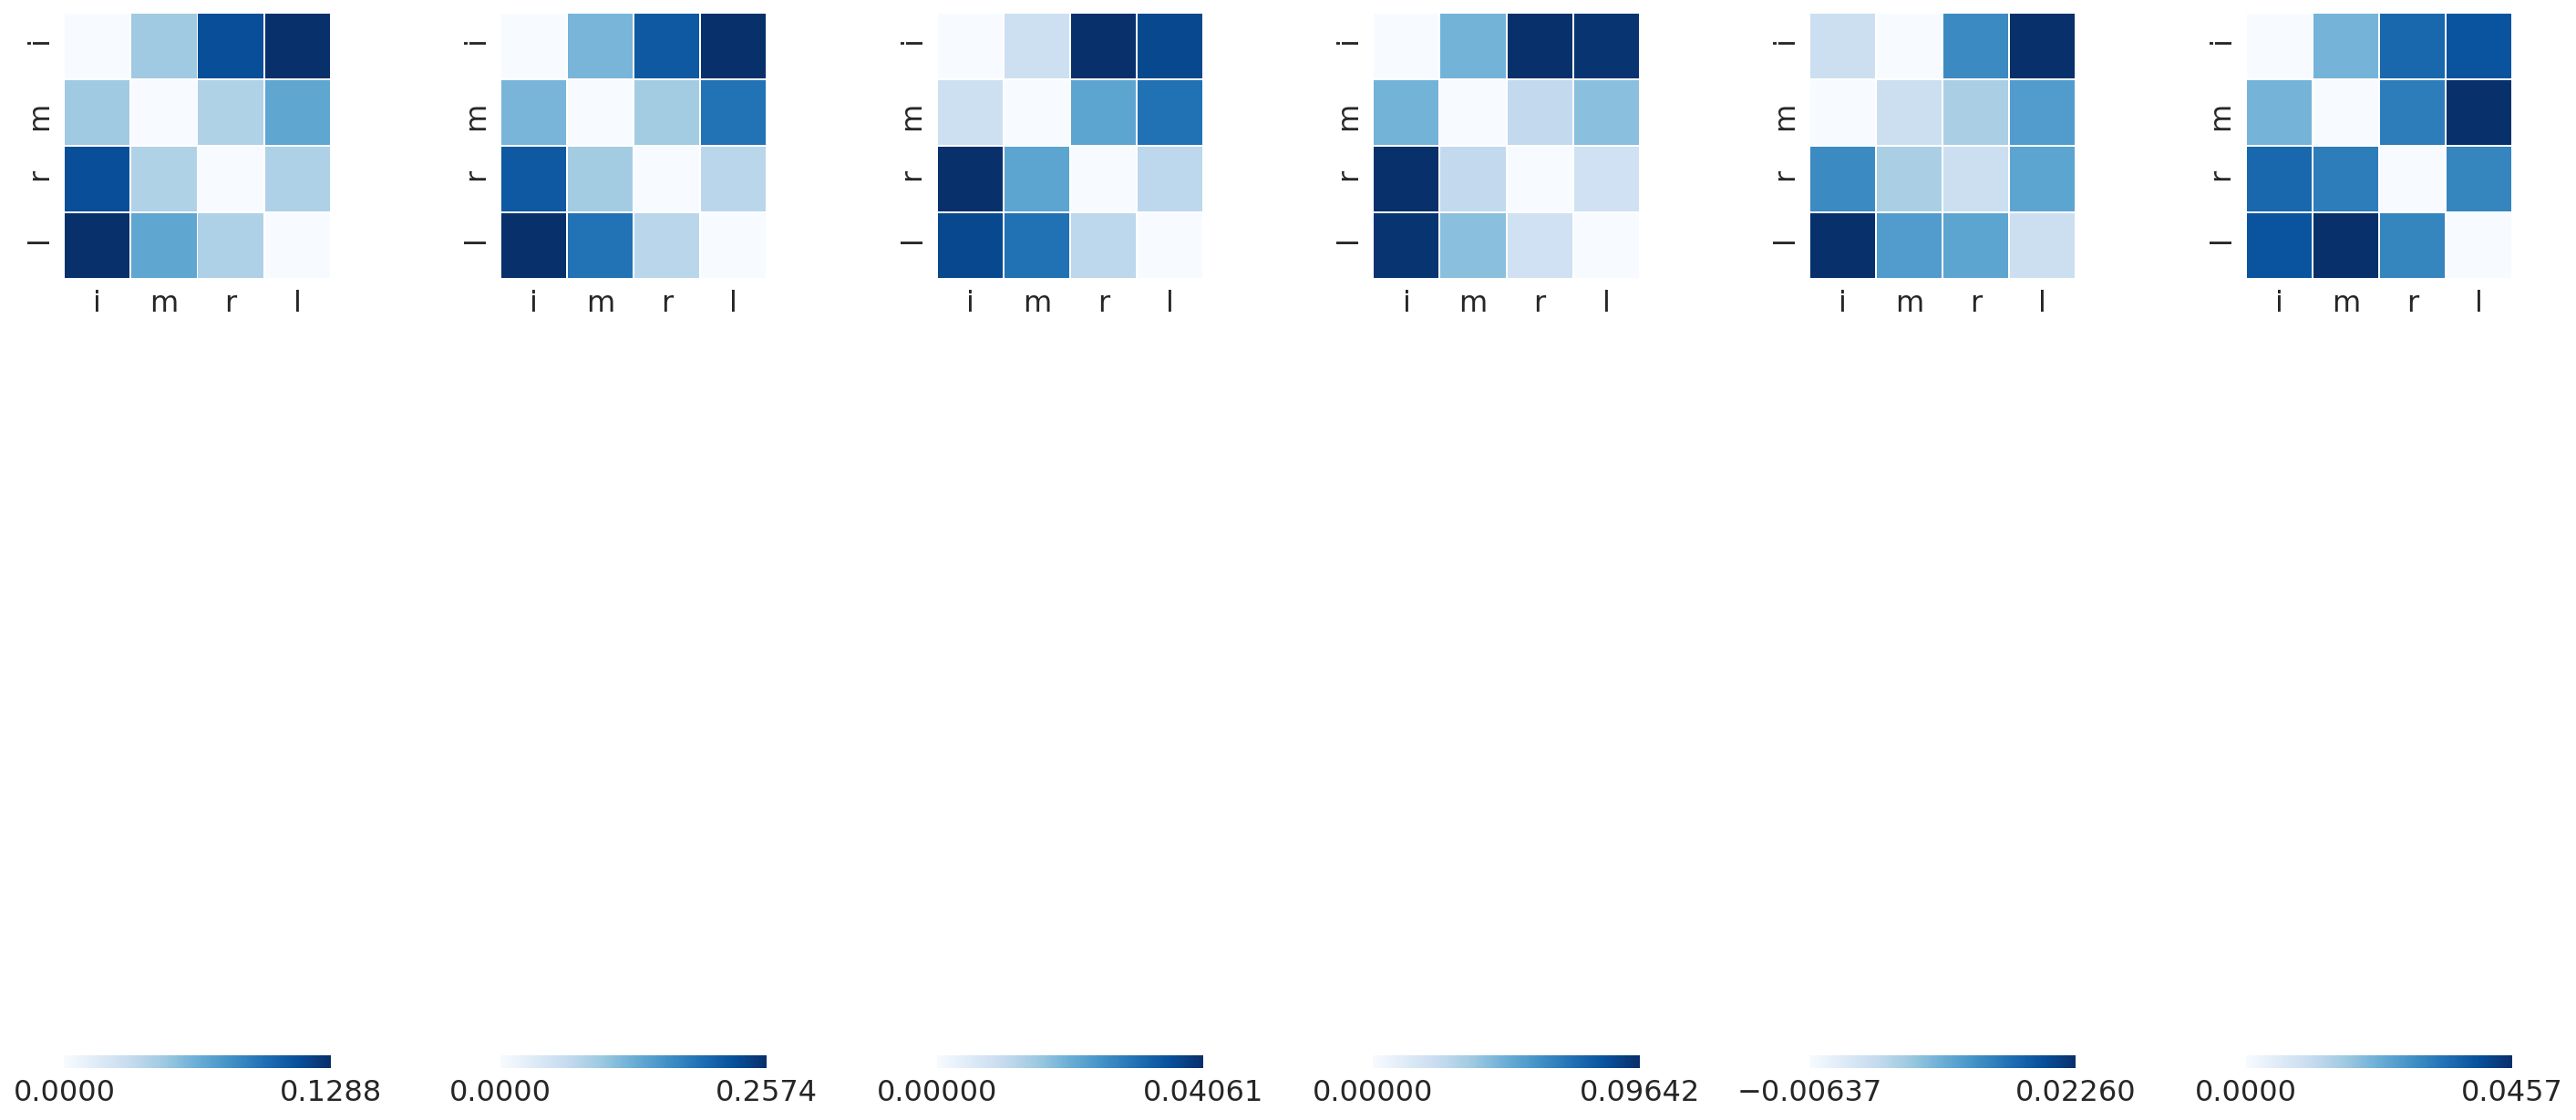

In [14]:
ax1 = fig.add_subplot(361)
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(20,40))
rois = ['m1', 's1', 'pmd', 'pmv', 'sma', 'spl']
# flatten axes for easy iterating
for roi, ax in zip(rois,(axes.flatten())):
    roirdm = '/home/beukema2/Desktop/source_data/fig4d_'+roi+'rdm.csv'
    rdm = pd.read_csv(roirdm, header=None)
    sns.heatmap(rdm, annot=False, fmt='.1f', linewidths=.5, cmap = plt.cm.Blues, \
                cbar=True, square=True, ax=ax,xticklabels=['i','m','r','l'], \
                yticklabels=['i','m','r','l'], \
                cbar_kws={'orientation': 'horizontal', 'ticks':[ rdm.values.min(), rdm.values.max()]})
fig.tight_layout()

### fig.4e

(0, 0.3)

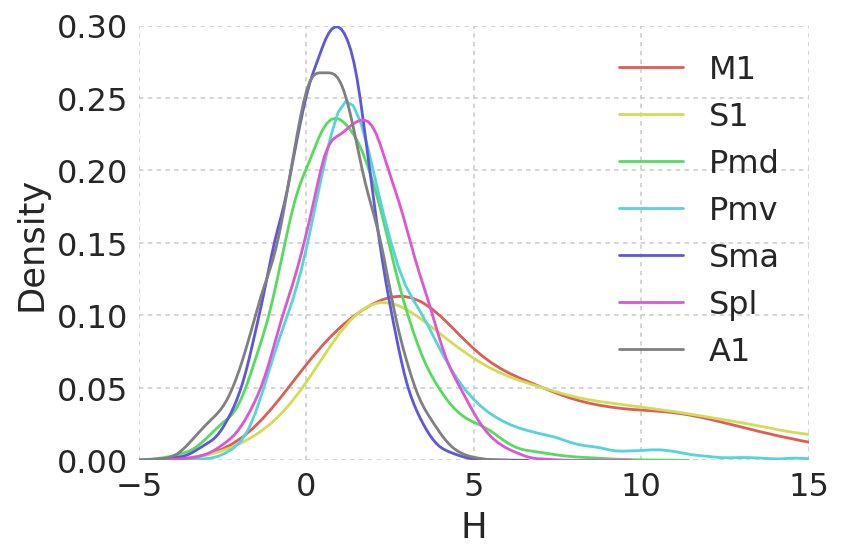

In [15]:
roi_medians = pd.DataFrame()
sns.set_style("white", {'axes.linewidth':0.0001, 'axes.edgecolor':'black'})
sns.set_palette("hls")
rois = ['m1', 's1', 'pmd', 'pmv', 'sma', 'spl', 'a1']
for roi in rois:
    df = pd.read_csv(os.path.expanduser(('/home/beukema2/Desktop/source_data/fig4e_%s_kde.csv')% (roi)), header=None)
    these_vals = df.values
    these_vals= these_vals[~np.isnan(these_vals)]
    
    if roi=='a1':
        sns.kdeplot(these_vals, color='gray', shade=False, label="A1") # make A1 gray to standout. 
    else:
        sns.kdeplot(these_vals, shade=False, label=roi.capitalize())
plt.grid(linestyle='dotted')
plt.legend()
plt.xlabel('H')
plt.ylabel('Density')
plt.xlim(-5,15)
plt.ylim(0,.3)

### fig.4f

(2.2290736111111116,
 array([ 0.9167,  1.1393,  1.8041,  1.9389,  1.9323,  1.8358,  1.7928]),
 array([ 3.5414,  3.3188,  2.6541,  2.5192,  2.5258,  2.6223,  2.6653]))

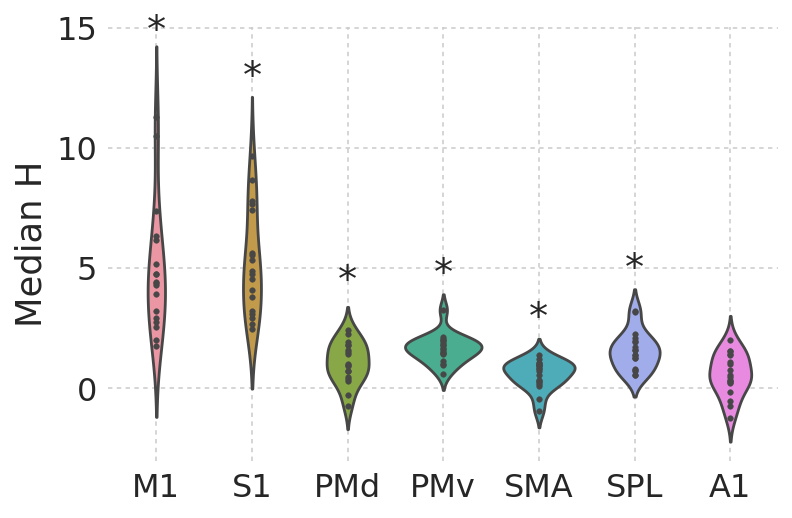

In [16]:
roi_medians = pd.read_csv('/home/beukema2/Desktop/source_data/fig4f_roimedians.csv')
sns.set_palette("hls")
ax = sns.violinplot(data=roi_medians, inner="points")
plt.grid(linestyle='dotted')
plt.ylabel('Median H')
ax.annotate('*', xy=(2, 1), xytext=(-.1, 14.4))
ax.annotate('*', xy=(2, 1), xytext=(.90, 12.5))
ax.annotate('*', xy=(2, 1), xytext=(1.9, 4))
ax.annotate('*', xy=(2, 1), xytext=(2.9, 4.3))
ax.annotate('*', xy=(2, 1), xytext=(3.9, 2.5))
ax.annotate('*', xy=(2, 1), xytext=(4.9, 4.5))
scipy.stats.ttest_1samp(roi_medians, 0)
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

mean_confidence_interval(roi_medians)

<a id='figure_5'></a>

### fig.5a

/home/beukema2/anaconda/lib/python2.7/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.tight_layout>

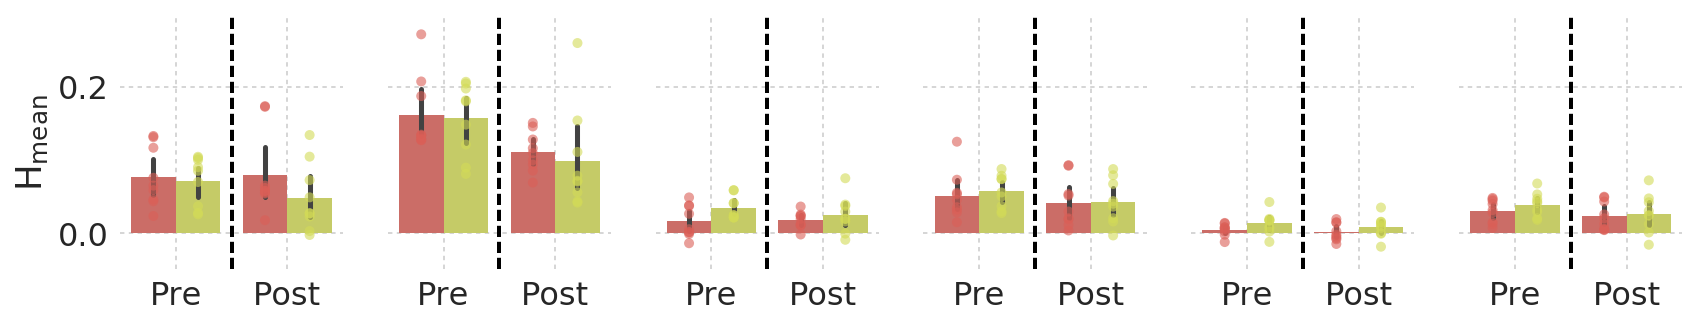

In [17]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(361)
distances = pd.read_csv('/home/beukema2/Desktop/source_data/fig5_mean_distance.csv', header=None)
distances.columns = ['distance','group','roi', 'pre_post']
di = {1:'T', 2:'C'}
distances = distances.replace({'group':di})
colors = {'T': "#FFFFFF",'C': "#1726d3"}
current_plot_number = 361
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6)
plt.grid(linestyle='dotted')
ax = plt.gca()
g.legend_.remove()
ax.set_ylim([-.05, .3])
g.set_xticklabels(['Pre','Post'])
ax.set_xlabel('')
plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
ax.set_ylabel(r'$\mathrm{H_{mean}}$')

for i in arange(2,7):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
    sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
    ax = plt.gca()
    ax.legend_.remove()
    plt.grid(linestyle='dotted')
    ax.set_xlabel('')
    ax.set_ylim([-.05, .3])
    g.set_xticklabels(['Pre','Post'])
    ax.set_yticklabels([])
    ax.set_ylabel('')
    plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)
plt.tight_layout

### fig5b

<function matplotlib.pyplot.tight_layout>

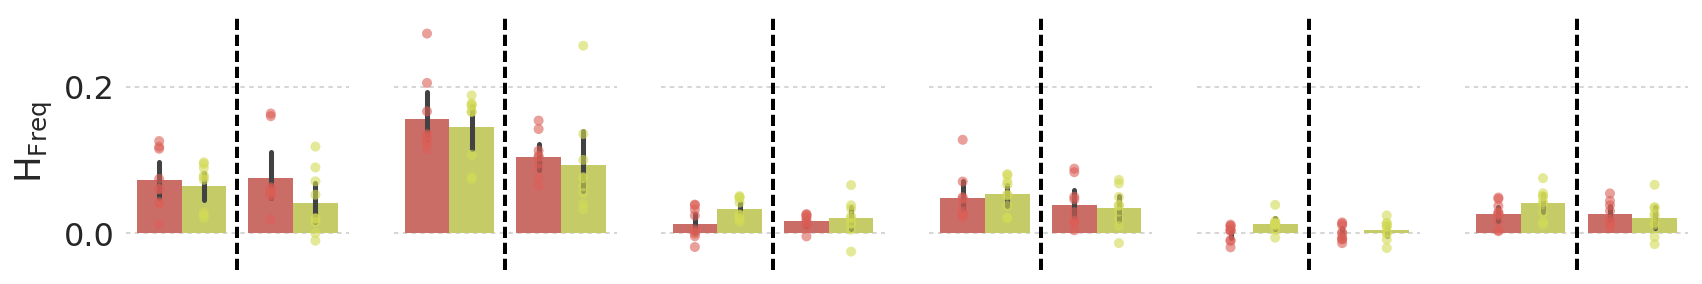

In [18]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(361)
distances = pd.read_csv('~/Desktop/source_data/fig5_median_split_distance.csv', header=None)
distances.columns = ['distance','group','roi', 'pre_post', 'bound_unbound']
di = {1:'T', 2:'C'}
distances = distances[distances.bound_unbound == 1]
distances = distances.replace({'group':di})
colors = {'T': "#FFFFFF",'C': "#1726d3"}
current_plot_number = 361
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
plt.grid(linestyle='dotted')
ax = plt.gca()
g.legend_.remove()
ax.set_ylim([-.05, .3])
ax.set_xticks([])
ax.set_xticklabels(['Pre','Post'])
ax.set_xlabel('')
plt.plot([.5, .5], [-0.05, .3], 'k--', linewidth=2)
ax.set_ylabel(r'$\mathrm{H_{Freq}}$')

for i in arange(2,7):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
    sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);

    plt.grid(linestyle='dotted')
    ax = plt.gca()
    ax.legend_.remove()
    plt.grid(linestyle='dotted')
    ax.set_ylabel('')
    ax.set_xticklabels(['Pre','Post'])


    ax.set_xlabel('')
    ax.set_xticks([])
    ax.set_ylim([-.05, .3])
    ax.set_yticklabels([])
    plt.plot([.5, .5], [-.05, .3], 'k--', linewidth=2)

plt.tight_layout

### fig5c

<function matplotlib.pyplot.tight_layout>

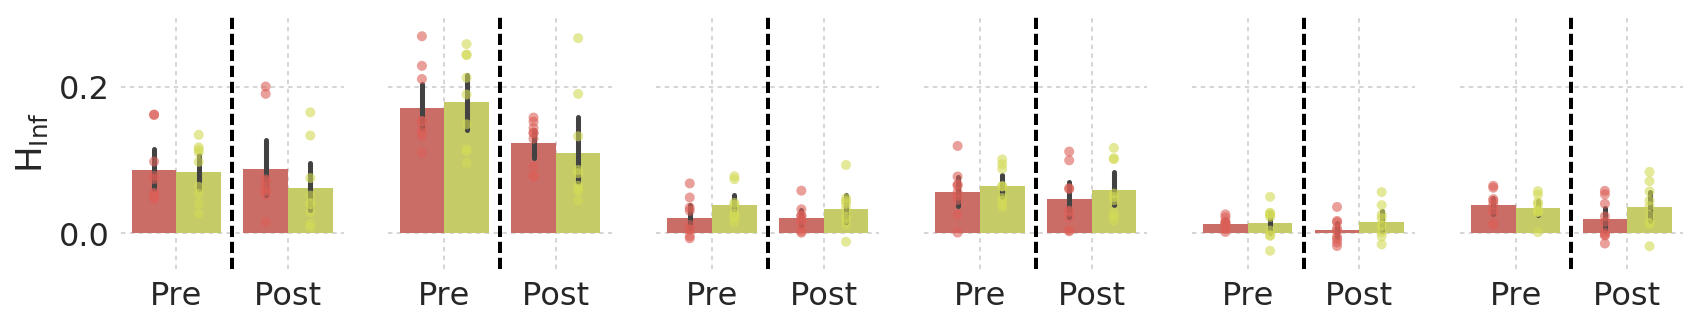

In [19]:
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(361)
distances = pd.read_csv('~/Desktop/source_data/fig5_median_split_distance.csv', header=None)
distances.columns = ['distance','group','roi', 'pre_post', 'bound_unbound']
di = {1:'T', 2:'C'}
distances = distances[distances.bound_unbound == 2]
distances = distances.replace({'group':di})
colors = {'T': "#ef8d23",'C': "#1726d3"}
current_plot_number = 361
roi_num = 1
ax1 = fig.add_subplot(current_plot_number)
this_roi = distances[distances['roi']==roi_num]
g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
plt.grid(linestyle='dotted')
ax = plt.gca()
g.legend_.remove() 
ax.set_ylim([-.05, .3])
ax.set_xticklabels(['Pre','Post'])
ax.set_xlabel('')
plt.plot([.5, .5], [-0.05, .3], 'k--', linewidth=2)
ax.set_ylabel(r'$\mathrm{H_{Inf}}$')

for i in arange(2,7):
    current_plot_number += 1
    roi_num +=1
    plt.grid(linestyle='dotted')
    ax1 = fig.add_subplot(current_plot_number)
    this_roi = distances[distances['roi']==roi_num]
    g = sns.barplot(y='distance', x='pre_post', hue='group',data=this_roi)
    sns.stripplot(y='distance', x='pre_post', hue='group',data=this_roi, split=True, alpha=.6);
    plt.grid(linestyle='dotted')
    ax = plt.gca()
    ax.legend_.remove()
    plt.grid(linestyle='dotted')
    ax.set_ylabel('')
    ax.set_xticklabels(['Pre','Post'])
    ax.set_xlabel('')
    ax.set_ylim([-.05, .3])
    ax.set_yticklabels([])
    plt.plot([.5, .5], [-0.05, .3], 'k--', linewidth=2)

plt.tight_layout